In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *


In [4]:
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [5]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [6]:
dest= 'images/grizzly.jpg'
download_url(ims[0],dest,show_progress=False)

Path('images/grizzly.jpg')

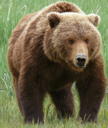

In [7]:
im = Image.open(dest)
im.to_thumb(128,128)

In [8]:
bear_types='grizzly', 'black', 'teddy'
path=Path('bears')


In [9]:
searches='teddy','grizzly','black'
path=Path('bears')

for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
    
        download_images(dest, urls=search_images_ddg( f'{o} bear'))

In [10]:
fns = get_image_files(path)
fns

(#2081) [Path('bears/black/6199ed9f-4313-4c4c-9896-997bf37d2613.jpg'),Path('bears/black/2b218dfe-2521-466d-ae64-44cc39a32777.jpg'),Path('bears/black/332ee348-90af-4360-a0c3-4096dede1773.jpg'),Path('bears/black/8dfdd7da-786d-48bd-8d53-899d94ea26cc.jpg'),Path('bears/black/a03092cd-2cc3-407a-8a89-ae526d7b8f9f.jpg'),Path('bears/black/55d3906e-0207-4c4c-bd1d-e9f3f9b43738.jpg'),Path('bears/black/355fbab6-6459-4cf5-a8e4-5078d1dc4427.jpg'),Path('bears/black/742fa47e-0e36-4f65-ba46-560301679ef0.jpg'),Path('bears/black/b3bb022c-032c-4f8b-be6f-f7d4c04550e2.jpg'),Path('bears/black/a6bbefcc-4983-4f63-ac14-c9a6b4956000.jpg')...]

In [11]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

33

In [12]:
bears=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(128)]
)

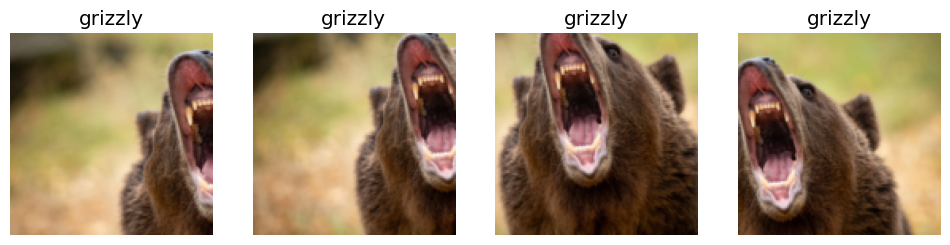

In [13]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [14]:
learn = vision_learner(dls, resnet18, metrics= error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.707932,0.218635,0.034230,00:39


/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.248638,0.124073,0.026895,01:04
1,0.162856,0.087760,0.019560,00:53
2,0.116913,0.083727,0.022005,00:51


/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWar

/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


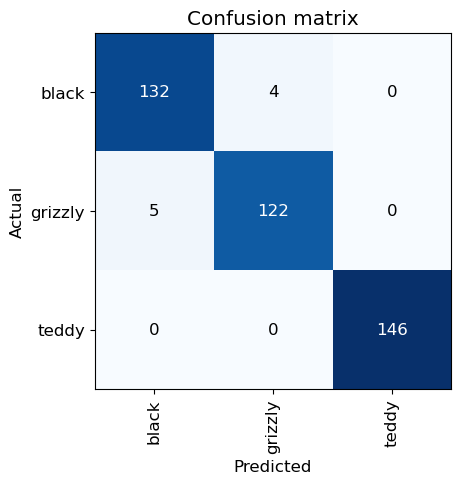

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

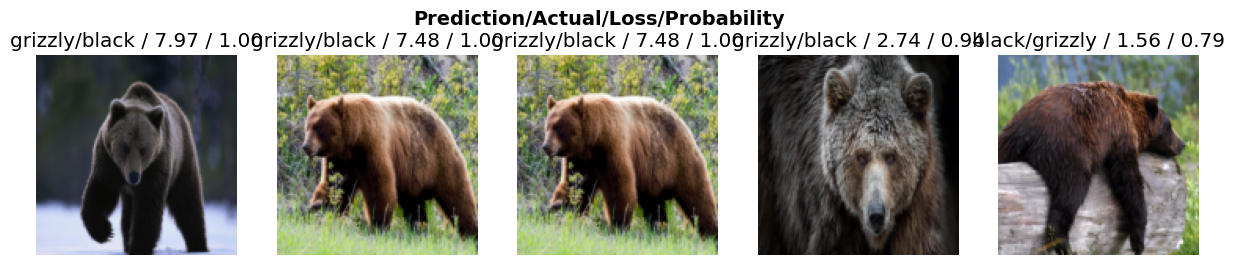

In [16]:
interp.plot_top_losses(5, nrows=1)

In [17]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [19]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#2) [Path('export-Copy1.pkl'),Path('export.pkl')]

In [20]:
learn_inf = load_learner(path/'export.pkl')

In [21]:
learn_inf.predict('bears/teddy/0b9ae46e-91b1-42fa-a63d-72a2b2f1e5b8.jpg')

('teddy', tensor(2), tensor([1.3664e-05, 1.5465e-05, 9.9997e-01]))

In [22]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [24]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value=(), description='Upload')

In [25]:
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [26]:
img = PILImage.create(btn_upload.data[-1])

In [27]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [28]:
pred,pred_idx,probs = learn_inf.predict(img)

In [29]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9905')

In [30]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [31]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [35]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [36]:
import gradio as gr
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)

AttributeError: module 'gradio' has no attribute 'inputs'